# __Gradient Stochastique et régularisation  $\ell^1$__

<h1><a id='toc'></a>Sommaire</h1>

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li><a href="#I">I. Introduction </a></li>
        <ul>
        <li><a href="#I1">I.1. Un exemple en dimension 1</a></li>
        <li><a href="#I2">I.2. Un cas degeneré</a></li>
        <li><a href="#I3">I.3. Un exemple en plus grande dimension </a></li>
        </ul>
        <li><a href="#II">II. Optimisation numérique de $F_\lambda$ par ISTA</a></li>
        <ul>
            <li><a href="#II1">II.1. Réinterpretation de la méthode du gradient à pas constant</a></li> 
            <li><a href="#II2">II.2. ISTA </a></li> 
        </ul>
        <li><a href="#III">III. Application à l'optimisation stochastique</a></li>
    </ul>
</div>
<br>
<hr>

Importation des bibliothèques

In [1]:
from toynn_2023 import *
# charge aussi les bibliothèques suivantes :
#    import numpy as np
#    from numpy import random as nprd
#    from matplotlib import pyplot as plt
#    from matplotlib import cm as cm
#    from copy import deepcopy as dcp
import math as mt
from numpy import linalg as ln

# I. Introduction <a id='I'></a>

<a href="#toc">top</a>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
<a href="#I">I.</a>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
<a href="#I1">I.1</a>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
<a href="#I2">I.2</a>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
<a href="#I3">I.3</a>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
<a href="#II">II.</a>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
<a href="#II1">II.1</a>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
<a href="#II2">II.2</a>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
<a href="#III">III.</a>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
<a href="#bot">bot.</a>

On veut optimiser une fonction objectif régulière et convexe $F(w)$ mais on veut aussi privilégier les solutions parcimonieuses, c'est-à-dire les paramètres $w$ avec un grand nombre de composantes nulles. Pour cela, nous pénalisons la fonction objectif en ajoutant le terme ``régularisant'' $\lambda\|w\|_1$. Ici $\lambda\geq0$ est le paramètre de pénalisation et
$$
\|w\|_1 :=\sum_{j=0}^{N-1}|w_j|=|w_0|+|w_1|+\dots+|w_{N-1}|
$$
est la norme $\ell^1$ du vecteur $w$.

<a id='I1'></a>
<h2>I.1. Un exemple en dimension 1</h2>

<a href="#toc">top</a>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
<a href="#I">I.</a>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
<a href="#I1">I.1</a>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
<a href="#I2">I.2</a>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
<a href="#I3">I.3</a>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
<a href="#II">II.</a>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
<a href="#II1">II.1</a>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
<a href="#II2">II.2</a>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
<a href="#III">III.</a>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
<a href="#bot">bot.</a>

Considérons d'abord le cas $N=1$. Soit $\,\bar w\in\mathbb{R}\,$. On définit $\,f(w)=\frac12|w-\bar w|^2\,$ et pour $\,\lambda\ge 0\,$, on pose
$$\,f_\lambda(w):=f(w)+\lambda\|w\|_1\,=\, \frac12|w-\bar w|^2+\lambda|w|.$$
Le minimiseur de $\,f\,$ est évidemment $\,\bar w\,$. Dans quelle mesure est-il perturbé par le terme régularisant ? Découvrons-le en calculant le minimiseur de $\,f_\lambda$.

**Remarques préliminaires.** La fonction $f$ est strictement convexe (elle est 1-convexe) et $w\mapsto |w|$ est convexe donc la fonction résultante $f_\lambda$ est $1$-convexe. Nous concluons que $f_\lambda$ admet un unique minimiseur. On le note $w^*$ comme d'habitude.

Pour $\lambda>0$, la fonction $f_\lambda$ n'est pas dérivable en $0$. Cependant, elle  est dérivable en tout point $w\neq0$ et si $w^*\neq 0$, on a la condition d'optimalité

$$
0=f'_\lambda(w^*)=w^*-\bar w +\lambda \mathop{signe}(w^*). \tag{0}
$$
Inversement, si (0) est vrai en point $\hat w\neq0$, alors $\hat w =w^*$.

Pour l'analyse on considère quatre cas selon les valeurs de $\bar w$ et $\lambda$.

**1. Premier cas**$\,$ Si $\bar w=0$, on a évidemment $w^*=0$ $~~$($\,f_\lambda(0)=0\,$ et $\, f_\lambda(w)>0\,$ si $\,w\neq0\,$).

**2. Deuxième cas**$\,$ Si $\lambda=0\,$ alors $\,f_\lambda(w)=f(w)=\frac12|w-\bar w|^2\,$ et le minimiseur est $\,w^*=\bar w$.

**3. Troisième cas** $\, $ Nous supposons $\,\lambda>0\,$ et $\,\bar w>0\,$. Nous remarquons d'abord que $\,w^*\geq 0$.
En effet, pour $\,w<0\,$, il existe $\quad|w-\bar w|= \bar w - w>\bar w = |0-\bar w|,\quad $ so
$\quad
f_\lambda(w)>f_\lambda(0)\geq f_\lambda(w^*)
\quad$ et nous voyons que $\,w^*\neq w$.

Ensuite, si $\,w^*>0\,$, alors par (0) nous avons $\,w^*=\bar w-\lambda$. Ce nombre est positif si et seulement si $\,\bar w>\lambda$. Nous concluons que :

$$
w^*=\begin{cases}\bar w-\lambda &\text{if } \bar w>\lambda,\\
\quad 0 & \text{if } 0<\bar w\leq\lambda. \end{cases}
$$

**4. Quatrième cas** Nous supposons toujours $\,\lambda>0\,$ mais $\,\bar w<0$. En raisonnant comme ci-dessus, on voit que $\,w^*\leq 0\,$ puis

$$
w^*=\begin{cases}\bar w+\lambda &\text{if } \bar w<-\lambda,\\
\quad 0 & \text{if } -\lambda\leq \bar w<0. \end{cases}
$$

**Conclusion** $\, $ En résumé :
$$
w^*=\begin{cases}\bar w-\lambda\ \text{sign}\,\bar w &\text{if } |\bar w|>\lambda,\\
\qquad 0 & \text{if } |\bar w|\leq \lambda. \end{cases}
$$

On peut mesurer la distance entre le minimiseur de $\,f\,$ et le minimiseur de $\,f_\lambda\,$ :

$$
|\bar w|>\lambda\ \Longrightarrow\ |w^* -\bar w|=\lambda\qquad\text{and}\qquad
|\bar w|\le\lambda\ \Longrightarrow\ |w^* -\bar w|=|\bar w|.
$$

Dans tous les cas :$\qquad\qquad\qquad\qquad\qquad|w^* -\bar w|\leq \lambda$.

Voici les tracés du graphique de la fonction $\bar w\mapsto w^*$ pour $\lambda =0$, $\lambda=1$, $\lambda=2$ et $\lambda=4$.

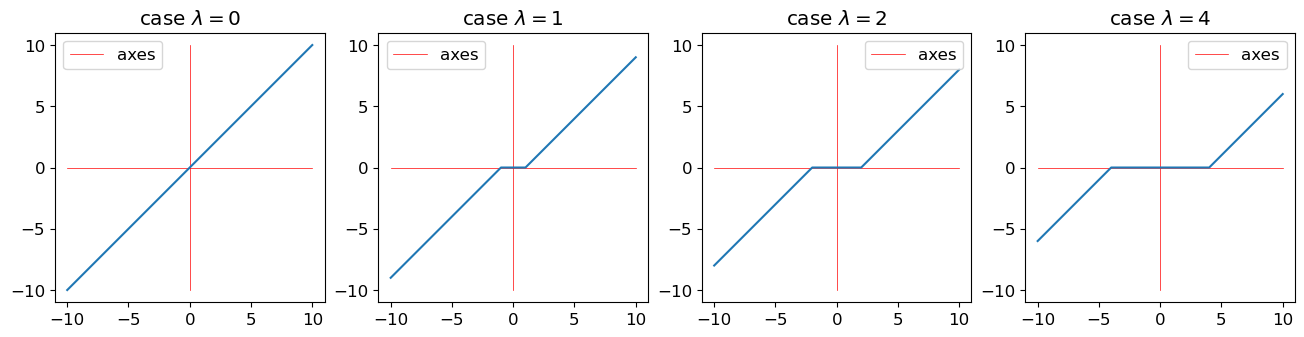

In [2]:
plt.rcParams.update({'font.size': 12})
if 1==1:
    buildf_lbda = lambda L: lambda w: np.where(w>L, w-L, 
                                               np.where( w<-L, w+L, 0))
    lbda = (0 , 1, 2 , 4)
    w=np.linspace(-10,10,41)
    plt.figure(figsize=(16,3.5))
    for i in range(4):
        plt.subplot(141 + i)
        plt.plot([-10, 10], [0, 0],'r',linewidth=.5, label='axes')
        plt.plot([0, 0], [-10, 10],'r',linewidth=.5)
        plt.plot(w, buildf_lbda(lbda[i])(w))
        plt.title(f"case $\lambda=$" + str(lbda[i]))
        plt.legend()

<a id='I2'></a>
<h2>I.2. Un cas dégénéré</h2>

<a href="#toc">top</a>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
<a href="#I">I.</a>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
<a href="#I1">I.1</a>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
<a href="#I2">I.2</a>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
<a href="#I3">I.3</a>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
<a href="#II">II.</a>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
<a href="#II1">II.1</a>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
<a href="#II2">II.2</a>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
<a href="#III">III.</a>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
<a href="#bot">bot.</a>

On considère ici, $N=2$ et 
$$
F(w):=\dfrac12(2w_0 + w_1 - 1)^2.
$$

**Exercice 1**

a) La fonction $F$ est-elle convexe ? fortement convexe ? coercive?

b) Trouvez les minimiseurs dans $\mathbb{R}^2$ de $F$.

c) Soit $\lambda>0$. Trouvez les minimiseurs de

$$
F_\lambda(w)=F(w)+\lambda\|w\|_1:= \dfrac12(2w_0 + w_1 - 1)^2 +\lambda (|w_0| +|w_1|).
$$

*__Indication :__ justifier que si la compososante $w^*_j$ d'un point de minimum $w^*$ est non nulle alors $\dfrac {\partial F_\lambda(w^*)}{\partial w_j}$ est bien défini et nul.*

d) Interprétez le résultat de (c) : quels sont les effets du terme régularisant $\lambda \|w\|_1$ ?

<div class="alert alert-block alert-info" style="margin-top : 0px">
    
___Solution 1.a.___

</div>

<div class="alert alert-block alert-info" style="margin-top : 0px">
    
___Solution 1.b.___

</div>

<div class="alert alert-block alert-info" style="margin-top : 0px">
    
___Solution 1.c.___

</div>

<div class="alert alert-block alert-info" style="margin-top : 0px">
    
___Solution 1.d.___

</div>

<a id='I3'></a>
<h2>I.3. Un exemple en plus grande dimension</h2>

<a href="#toc">top</a>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
<a href="#I">I.</a>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
<a href="#I1">I.1</a>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
<a href="#I2">I.2</a>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
<a href="#I3">I.3</a>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
<a href="#II">II.</a>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
<a href="#II1">II.1</a>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
<a href="#II2">II.2</a>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
<a href="#III">III.</a>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
<a href="#bot">bot.</a>

Considérons maintenant une fonction quadratique non dégénérée comme en **I.1** mais en dimension supérieure $N\geq 1$. Nous fixons $\bar w\in \mathbb{R}^N$ et une suite de nombres $a_0,a_1,\dots,a_{N-1}>0$ et nous posons pour $w\in\mathbb{ R}^N$,

$$\tag{1}
F(w):=\dfrac12\sum_{j=0}^{N-1} a_j (w_j-\bar w_j)^2\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad
\qquad\qquad=\dfrac{a_0}2(w_0-\bar w_0)^2 + \dfrac{a_1}2(w_1-\bar w_1)^2+\dots + \dfrac{a_{N-1}} 2(w_{N-1}-\bar w_{N-1})^2.
$$

Comme dans la partie <a href="#I1">I.1.</a> la fonction $\,F\,$ est fortement convexe : elle est $\gamma$-convexe pour
$$\gamma=\min\{a_j,j=0,\dots,N-1\}\, >0.$$
On note $\,\bar w\,$ l'unique minimiseur de $\,F$.

Fixons $\lambda>0$ et fixons comme plus haut, $F_\lambda(w):=F(w)+\lambda \|w\|_1$. La fonction $F_\lambda$ est à nouveau fortement convexe, on note son unique minimiseur $w^*$. 

À quelle distance de $w^*$ se trouve $\bar w$ ? À quel point est-il plus parcimonieux que $\bar w$ ? Pour le savoir nous allons déterminer explicitement $w^*$.

Remarquons tout d'abord que $F_\lambda$ se divise en $N$ fonctions d'un seul paramètre :

$$
F_\lambda(w)=\sum_{j=0}^{N-1} F^{(j)}_\lambda (w_j)\qquad
\text{with}\quad F^{(j)}_\lambda (w_j)=\dfrac{a_j}2(w_j-\bar w_j)^2 + \lambda |w_j|
= a_j\left\{\dfrac12(w_j-\bar w_j)^2 + \dfrac{\lambda}{a_j} |w_j|\right\}.
$$

Puisque les paramètres des fonctions $F_\lambda^{(j)}$ sont indépendants les uns des autres, nous pouvons optimiser séparément les $F_\lambda^{(j)}$. L'expression entre accolades est de la forme $f_{\lambda/a_j}(w_j)$ étudiée en <a href="#I1">I.1.</a>. Nous en déduisons que

$$\tag{2}
\text{Pour }j=0,\dots,N-1,\ \quad w^*_j=\begin{cases}\bar w_j-\dfrac\lambda{a_j}\ \text{signe}\, \bar w_j &\text{si } |a_j\bar w_j|>\lambda,\\
\qquad 0 &\text{si } |a_j\bar w_j|\leq \lambda. \end{cases}
$$

Notez que $|a_j\bar w_j|= \left| \dfrac{\partial F}{\partial w_j}(0)\right|$ mesure la sensibilité de $F$ par rapport aux variations de la $j$-ième variable .

Nous pouvons interpréter la formule ci-dessus comme suit :

$\quad\ $a) si cette sensibilité est suffisamment petite, _c'est-à-dire_ $\ \left| \dfrac{\partial F}{\partial w_j}(0)\right|\leq \lambda\ $ alors $w^*_j$ vaut 0. On a alors
$$
\tag{3a}
|a_j(w^*_j - \bar w_j)| \leq\lambda.
$$


$\quad\ $b) pour des sensibilités plus grandes $\ \left| \dfrac{\partial F}{\partial w_j}(0)\right| > \lambda\ $, $w^*_j$ est une approximation de $\bar w_j$, avec
$$
\tag{3b}
|a_j(w^*_j - \bar w_j)| =\lambda.
$$

**Remarque :** En réinterprétant (3a) et (3b) en fonction des composantes de $\nabla F$, on voit que pour chaque $j$
$$
\left|\dfrac{\partial F(w^*)}{\partial w_j} \right|\leq\lambda.
$$
Plus précisément, si on fixe tous les $\,w_k^*\,$ pour $k\,\neq j\,$,

$$\tag{4}
\text{le terme est $\,w_j^*\,$ minimise $\,|w_j|\,$ dans l'ensemble }\\
\left\{w_j\in\mathbb{R}\ :\ \left|\dfrac{\partial F}{\partial w_j}\right|(w^*_0,\dots,w^*_{j-1 },w_j,w^*_{j+1},\dots, w^*_{N-1})\leq\lambda\right\}.
$$

Ceci est également vrai pour toute fonction convexe $F$ de classe $C^1$, pas seulement pour les fonctions quadratiques.

Nous voyons que si nous choisissons $\lambda$ petit, $w^*$ sera une petite perturbation du minimiseur exact de $F$. De plus, si mettre $w^*_j$ à 0 ne crée qu'un gradient négligeable (inférieur à $\lambda$) alors $w^*_j$ vaut 0. En ce sens, la régularisation favorise la *parcimonie* de $w^*$.

# II. Optimisation numérique de $F_\lambda$ par ISTA<a id='II'></a> 

<a href="#toc">top</a>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
<a href="#I">I.</a>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
<a href="#I1">I.1</a>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
<a href="#I2">I.2</a>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
<a href="#I3">I.3</a>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
<a href="#II">II.</a>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
<a href="#II1">II.1</a>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
<a href="#II2">II.2</a>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
<a href="#III">III.</a>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
<a href="#bot">bot.</a>

__(__ ***''ISTA'' signifie ``Iterative Shrinkage-Thresholding Algorithm''*** __)__

Nous voulons optimiser une fonction convexe régulière $F:\mathbb{R}^N\to \mathbb{R}$ avec un terme de régularisation $\lambda \|w\|_1$ où le paramètre $\lambda\geq 0$ est donné.

<a id='II1'></a>
<h2>II.1. Réinterpretation de la méthode du gradient à pas fixe</h2>

<a href="#toc">top</a>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
<a href="#I">I.</a>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
<a href="#I1">I.1</a>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
<a href="#I2">I.2</a>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
<a href="#I3">I.3</a>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
<a href="#II">II.</a>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
<a href="#II1">II.1</a>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
<a href="#II2">II.2</a>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
<a href="#III">III.</a>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
<a href="#bot">bot.</a>

Supposons d'abord $\,\lambda =0$. Dans ce cas $\,F_\lambda=F\,$ est régulière et nous pouvons utiliser la méthode de gradient avec pas fixe $\,\alpha>0$. Nous commençons par réinterpréter cette méthode comme une succession de résolutions de problèmes d'optimisation. Nous commençons par un vecteur initial $\,w^0\in\mathbb{R}^N\,$ et nous construisons récusivement la suite $w^0$, $w^1$,$w^2$, $\ points$, avec les règles suivantes :

$\qquad$a) A l'étape $\,k$, connaissant l'itération courante $\,w^k$, on définit la fonction

$$\tag{5}
\Phi^k(w):=F(w^k) +\left<\nabla F(w^k);w-w^k\right> + \dfrac1{2\alpha}\|w-w^k\|^ 2
$$

Pour construire la fonction $\,\Phi^k\,$ nous sommes parti du développement de Taylor au premier ordre de $F$ et nous avons ajouté le terme quadratique $\,\|w-w^k\|^2/(2\alpha)$.  $\Phi^k$ est donc une approximation (au premier ordre) de $\,F\,$ près de $\,w^k\,$ et est une fonction quadratique définie positive.
En particulier, il admet un minimiseur unique.

$\qquad$b) $w^{k+1}\,$ est défini comme le minimiseur de $\,\Phi^k$.

Il est facile de déterminer le minimiseur de la fonction quadratique $\Phi^k$. Nous trouvons

$$
\tag{6}
w^{k+1} = w^k - \alpha \nabla F(w^k)
$$

Comme annoncé, nous retrouvons la formule donnant $\,w^{k+1}\,$ en fonction de $w^k$ pour la méthode de descente de gradient de pas $\alpha$.

**Exercice 2** Justifier la formule (6).

<div class="alert alert-block alert-info" style="margin-top: 0px">
    
___Solution 2.___ 
    
</div>

<a id='II2'></a>
<h2>II.2. ISTA</h2>

<a href="#toc">top</a>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
<a href="#I">I.</a>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
<a href="#I1">I.1</a>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
<a href="#I2">I.2</a>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
<a href="#I3">I.3</a>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
<a href="#II">II.</a>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
<a href="#II1">II.1</a>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
<a href="#II2">II.2</a>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
<a href="#III">III.</a>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
<a href="#bot">bot.</a>

Nous supposons maintenant $\lambda>0$ de sorte qu'on a un terme de régularisation $\ell^1$. Pour optimiser $F_\lambda$, nous partons toujours d'une estimation initiale $w^0$ et construisons récursivement une suite $w^0$, $w^1$, $w^2$, $\dots$ où à l'étape $k,\,$ $w^{k+1}$ est défini comme le minimiseur de

$$\tag{7}
\Phi_\lambda^k(w):= \Phi^k(w)+\lambda \|w\|_1.
$$

Notez que nous **ne remplaçons pas** le terme de pénalisation par son développement de Taylor au voisinage de $w^k$.

En rappelant la définition de $\ \Phi^k,\ $ nous avons
$$\tag{8}
\Phi_\lambda^k(w)=F(w^k) +\left<\nabla F(w^k);w-w^k\right> + \dfrac1{2\tau}\|w-w^k\| ^2 +\lambda\|w\|_1.
$$

Pouvons-nous trouver une formule explicite pour $w^{k+1}$ ? Oui! En fait, nous sommes dans la situation de **I.2.** Notons $\,\bar w^k\,$ le minimiseur de $\,\Phi^k$. Par (6) nous avons

$$\tag{9}\bar w^k=w^k-\alpha\nabla F(w^k)$$

et la fonction $\Phi^k$ se réécrit comme
$$\tag{10}
\Phi^k(w) = c_k + \dfrac1{2\alpha} \|w - \bar w^k\|_2^2.
$$

**Exercice 3** Justifier la formule (10).

<div class="alert alert-block alert-info" style="margin-top: 0px">
    
___Solution 3.___

</div>

En tenant compte de (7) et (10) on voit que $w^{k+1}$ est le minimiseur de
$$
G(w):=\dfrac1{2\alpha} \|w - \bar w_k\|_2^2 + \lambda \|w\|_1.
$$
Cette fonction est de la forme (1) dans la partie **I.2.** avec $a_0=a_1=\dots=a_{N-1}=1/\alpha$. Ainsi, en utilisant la formule (2), nous avons

$$\tag{11}
\text{pour }j=0,\dots,N-1,\ \ w^{k+1}_j=
\begin{cases} \bar{w}^k_j - \lambda\alpha\ \text{sign}\, \bar w^k_j &
\text{si } |\bar{w}^k_j| > \lambda\alpha ,\\
\qquad 0 &
\text{si } |\bar{w}^k_j| \leq \lambda\alpha. \end{cases}\qquad
$$

**Résumé.** Nous déduisons de (9) et (11) une formule explicite pour $w^{k+1}$. Après l'initialisation, ISTA s'exécute comme suit : pour $k=0,1,\dots$ calculer
$$\tag{12}
\begin{array}{rl} \hfill\bar{w}^k :=&w^k-\alpha\nabla F(w^k), \\ \\
\text{pour }j=0,\dots,N-1,\quad \ w^{k+1}_j:=&
\begin{cases} \bar{w}^k_j - \lambda\alpha\ \text{sign}\, \bar w^k_j &
\text{si } |\bar{w}^k_j| > \lambda\alpha ,\\
\qquad 0 &
\text{si } |\bar{w}^k_j| \leq \lambda\alpha. \end{cases}
\end{array}
$$

**Exercice 4** Nous souhaitons tester cet algorithme avec
$$
F(w):=\sum_{j=0}^{N-1} \sin^2(\pi (w_j - w^*_j)),
$$
où la suite $w^*_0,\dots,w^*_{N-1}$ est donnée.<br>
Justifiez la formule pour $\nabla F$ donnée ci-dessous dans la définition de la fonction python  _builGradF_.


<div class="alert alert-block alert-info" style="margin-top: 0px">
    
    
___Solution 4.___ 

</div>

In [ ]:
## Exemple d'une fonction régulière non convexe

# Constructeur de F et Grad F
buildF = lambda barw : lambda w : np.sum(
                            np.sin(np.pi*(w - barw))**2 )
buildGradF = lambda barw : lambda w : np.pi*np.sin(2*np.pi*(w - barw))

# Fonction pour compter le nombre de composantes non nulles d'un vecteur
count_non_zeros= lambda w: np.sum(np.where(w==0, 0, 1)) 

<a href="#toc">top</a>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
<a href="#I">I.</a>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
<a href="#I1">I.1</a>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
<a href="#I2">I.2</a>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
<a href="#I3">I.3</a>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
<a href="#II">II.</a>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
<a href="#II1">II.1</a>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
<a href="#II2">II.2</a>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
<a href="#III">III.</a>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
<a href="#bot">bot.</a>

**Exercice 5** Mettez en oeuvre ISTA (compléter la quatrième boîte ci-dessous) pour la fonction précédente. On prendra $N=100$ et $\lambda=2$. 

Faites des représentations graphiques des valeurs prises par $F_\lambda$ au cours des itérations, ainsi que du nombre de composantes non nulles de chaque itéré.<br>

Faites varier la valeur de $\lambda$ et noter vos observations et commentaires dans la boîte dédiée.

_Indication :_ La méthode numpy _np.where_ peut se révéler utile. Si _w_ est un tableau numpy, disons un vecteur, la  commande
<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
v$=$np.where(abs(w)<1, f(w), g(w))<br>
construit un tableau numpy _v_ de même taille que _w_ avec la règle suivante.   
$$
\text{v}[i]=\begin{cases} \text{f}(\text{w}[i])&\text{si }\text{abs}(\text{w}[i])<1,\\
\text{g}(\text{w}[i])&\text{sinon}.\end{cases}
$$

Nous indiquons aussi que la norme $\ell^1$ d'un tableau numpy _w_ s'obtient à la l'aide de la méthode _numpy.linalg.norm_. Par exemple, la commande<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
norme_l1$=$ln.norm(w, ord=1))<br>
calcule la somme  $\sum_i$*w*[$i$] (et attribue cette valeur à la variable *norme_l1*).


In [ ]:
## (Préliminaire pour l'exercice 5)
# Construction du problème
N = 100
w_star = .5*nprd.random(N) - .25
F, GradF = buildF(w_star), buildGradF(w_star)

In [ ]:
## (Préliminaire pour l'exercice 5)
# Paramètres de l'algorithme d'optimisation 
alpha = .1
Lambda = 2
threshold = alpha*Lambda # threshold
Nitermax =15

In [ ]:
## (Préliminaire pour l'exercice 5)
# Initialisation
w = .5*nprd.random(N) - .25
niter=0

# On créé deux listes pour l'analyse du comportement de l'algorithme d'optimisation.
# La liste E pour stocker les valeurs de la fonctions à minimiser.
E = [(F(w) + Lambda*ln.norm(w, ord=1))]
# La liste NZ pour stocker le nombre d'éléments nons nuks des w^k.
NZ = [count_non_zeros(w)] 

In [ ]:
## Solution 5
# Boucle d'optimisation

In [ ]:
# Solution 5 (suite) Représentations graphiques.

<div class="alert alert-block alert-info" style="margin-top: 0px">
    
___Solution 5___. (commentaires). 
    
</div>   

**Exercice 6** Nous proposons la fonction

$$
F(w):=\sum_{j=0}^{N-1} \sin^2(w_j - w_{j-1}),
$$
où les indices $j$ sont compris modulo $N$.

a) Justifiez la formule de $\nabla F$ donnée dans la boîte suivante.

b) Quels sont les minimiseurs de $F$ ?

c) Quels sont les minimiseurs de $F_\lambda$ pour $\lambda>0$ ?

d) Appliquez votre implémentation d'ISTA à l'optimisation de $F_\lambda$. Dans le cas $\lambda=0$, est-ce que les itérations convergent vers un minimiseur de $F$ ?

e) Dans le cas $\lambda>0$, est-ce que les itérations convergent vers un minimiseur de $F_\lambda$ ? Sinon, pourquoi ?

f) Les itérées convergent-elles vers un vecteur proche d'un minimiseur de $F$ ? Les solutions trouvées sont elles parcimonieuses ? Vos résultats numériques sont-ils cohérents avec (4) ? Justifier.

In [ ]:
F = lambda w : np.sum( np.sin(w - np.roll(w,1))**2 )
GradF = lambda w : 2*np.sin(2*w - np.roll(w,1) - np.roll(w,-1))*np.cos(np.roll(w,1)                                                                   - np.roll(w,-1))

<div class="alert alert-block alert-info" style="margin-top: 0px">
    
   ___Solution 6.___ 

 </div>

# III. Application à l'optimisation stochastique <a id='III'></a>

<a href="#toc">top</a>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
<a href="#I">I.</a>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
<a href="#I1">I.1</a>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
<a href="#I2">I.2</a>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
<a href="#I3">I.3</a>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
<a href="#II">II.</a>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
<a href="#II1">II.1</a>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
<a href="#II2">II.2</a>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
<a href="#III">III.</a>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
<a href="#bot">bot.</a>

__Exercice 7.__


a) Implémentez ISTA dans le cadre du problème de classification et de réseaux de neurones jouets définis ci-dessous. On prendra le taux d'apprentissage $\alpha=5\cdot10^{-2}$ et $\lambda=10^{-3}$.

Pour ce qui est de l'algorithme, les changements par rapport à ISTA sont :

$\qquad\alpha$) dans la première étape de (12) on remplace $\nabla F(A)$ par une moyenne des $\nabla f_i(A)$ avec $i$ parcourant un mini-lot $I$ d'indices tirés au hasard.

$\qquad\beta$) On utilise une stratégie de taux d'accroissements décroissants.

Pour l'éude (graphique) de l'algorithme, on stockera l'erreur totale sur l'échantillon d'apprentissage ainsi que le nombre de composantes non nulles du paramètre $A$ au cours des époques.

*Indications :*<br> 
$\qquad\qquad\bullet$ La méthode _nn.count_non_zero(A)_ renvoie le nombre de composantes non nulles de la liste de coefficients _A_.<br> 
$\qquad\qquad\bullet$ Combinée avec *np.where()*, la méthode *nn.maps()* est très pratique pour calculer les itérés de ISTA.<br>Si $f$ est une fonction qui prend en paramètres un tableau numpy _X_ et (éventuellement) un paramètre _p_ et renvoie un tableau de la même taille que _X_ alors, la méthode _nn.maps(f,A,param=p, output=False)_ remplace tous les coefficients $A_i$ de _A_ par *f(*$A_i$*,p)*.<br>




b) Observez les résultats numériques obtenus avec les paramètres proposés dans les deux boîtes suivantes. 

c) Essayez différentes valeurs pour $\lambda$ et commentez.

<div class="alert alert-block alert-info" style="margin-top: 0px">

___Solution 7.___ 

</div>

In [ ]:
# pb
pb = ToyPb(name = "ring", bounds = (-1,1), loss="demanding")

# data
ndata = 1000
data = nD_data(n = ndata, pb = pb, init_pred=True)

data.show_class()
pb.show_border('k--')
plt.legend(loc=1, fontsize=15)
plt.show()

# nn
CardNodes = (2, 8, 8, 8, 1)
nn= ToyNN(card = CardNodes, coef_bounds=(-1,1,-1,1),  chi="tanh", grid=(-1,1,41))

In [ ]:
## Paramètres de l'algorithme

In [ ]:
## Initialisations 

In [ ]:
## ISTA-Iterations


In [ ]:
## Représentations graphiques de l'évolution de l'erreur et d au cours des époques.


<a id='bot'></a>
<a href="#toc">top</a>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
<a href="#I">I.</a>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
<a href="#I1">I.1</a>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
<a href="#I2">I.2</a>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
<a href="#I3">I.3</a>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
<a href="#II">II.</a>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
<a href="#II1">II.1</a>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
<a href="#II2">II.2</a>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
<a href="#III">III.</a>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
<a href="#bot">bot.</a>